<a href="https://colab.research.google.com/github/vnewsome/project_chd/blob/main/ML_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DS3001: Machine Learning Project 2


**Introduction**

This project aimed to make predict the likelihood of a person developing Coronary Heart Disease (CHD) using data from the Framingham Heart Study. We had to evaluate which variables were suitable to include, which of these variables should be used in building predictive algorithms, and how these models can be optimized and combined for better prediction results. Data was examined and cleaned, then linear models were made due to treating multiple variables as numeric. While this produced functional models, they were not especially predictive; we then shifted to treating the variables as categorical using trees. The prediction from this model yielded a much higher statistical significance. Variables that make practical sense best predicted the CHD likelihood, including age and smoking habits. Tree models performed well on the train and test set and could test against other samples of data sets to further test its prediction power, but more variables could also be tested through knn or kmc to validate that the untested variables are not crucial to the CHD model.

In [159]:
! git clone https://github.com/vnewsome/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


**Data Wrangling**

In [2]:
# load import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the training data
train_data = pd.read_csv("project_chd/fhs_train.csv", low_memory=False)

In [7]:
# load the testing data
test_data = pd.read_csv("project_chd/fhs_test.csv", low_memory=False)

In [163]:
# examining train_data
train_data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1267,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,1209,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,2050,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1183,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,3225,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0


In [164]:
# examining test_data
test_data.head()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,674,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,4070,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,3150,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,1695,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,2692,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0


In [165]:
# examining train_data types
column_dtypes = train_data.dtypes
print(column_dtypes)

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose            float64
TenYearCHD           int64
dtype: object


In [166]:
# examining test_data types
column_dtypes = test_data.dtypes
print(column_dtypes)

Unnamed: 0           int64
sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [8]:
# looks like heartRate is a float in the test data but an int in the training data
# we'll go ahead and make sure they match up by changing the data type in the training data to a float
train_data['heartRate'] = train_data['heartRate'].astype(float)
print(train_data['heartRate'].dtypes)

float64


In [168]:
# determining how many NaNs are in train_data
nan_columns = train_data.isnull().sum()
print(nan_columns)
total_columns = train_data.count()
print('\n', total_columns)

# variables in the TRAINING data that contain nans: education, cigsPerDay, BPMeds, totChol, BMI, glucose
# glucose is the only column with a high percentage of nans (~9%)
# NOTE: Nan values are left in for now** they will be removed if there is a problem later on

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64

 Unnamed: 0         3180
sex                3180
age                3180
education          3095
currentSmoker      3180
cigsPerDay         3156
BPMeds             3143
prevalentStroke    3180
prevalentHyp       3180
diabetes           3180
totChol            3141
sysBP              3180
diaBP              3180
BMI                3165
heartRate          3180
glucose            2895
TenYearCHD         3180
dtype: int64


In [169]:
# determining how many NaNs are in test_data
nan_columns = test_data.isnull().sum()
print(nan_columns)
total_columns = test_data.count()
print(total_columns)

# variables in the TEST data that contain nans: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose
# glucose has a higher proportion of Nans in the testing data ~10%
# NOTE: Nan values are left in for now** they will be removed if there is a problem later on

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64
Unnamed: 0         1060
sex                1060
age                1060
education          1040
currentSmoker      1060
cigsPerDay         1055
BPMeds             1044
prevalentStroke    1060
prevalentHyp       1060
diabetes           1060
totChol            1049
sysBP              1060
diaBP              1060
BMI                1056
heartRate          1059
glucose             957
TenYearCHD         1060
dtype: int64


In [170]:
# Examing how to impute NANs in train_data, and apply same imputes to test_data for consistency (same parent dataset)
print(train_data['education'].describe())
print(train_data['cigsPerDay'].describe())
print(train_data['BPMeds'].describe())
print(train_data['totChol'].describe())
print(train_data['BMI'].describe())
print(test_data['education'].describe())
print(test_data['cigsPerDay'].describe())
print(test_data['BPMeds'].describe())
print(test_data['totChol'].describe())
print(test_data['BMI'].describe())
print(test_data['heartRate'].describe())

# Can impute them all to the median

count    3095.000000
mean        1.957027
std         1.011135
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64
count    3156.000000
mean        8.970532
std        12.013704
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64
count    3143.000000
mean        0.029590
std         0.169479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64
count    3141.000000
mean      236.600764
std        44.847411
min       107.000000
25%       205.000000
50%       233.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64
count    3165.000000
mean       25.888117
std         4.130475
min        15.540000
25%        23.100000
50%        25.490000
75%        28.140000
max        56.800000
Name: BMI, dtype: float64
count    1

In [9]:
# Relatively few missings for everything except glucose, so impute those values to the median
# medians were filled in manually in the dictionary, tried to make it generalizable but ran into many datatype errors (methods vs ints vs objects)

# Imputing train_data
train_coerce_list = ['education','cigsPerDay','BPMeds','totChol','BMI']
train_median_dict = {'education': 2.0,'cigsPerDay' : 0.0,'BPMeds' : 0.0,'totChol' : 233.0,'BMI' : 25.49}
train_data.loc[:,train_coerce_list] = train_data.fillna(train_median_dict)

# Imputing test_data
test_coerce_list = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate']
test_median_dict = {'education': 2.0,'cigsPerDay' : 1.0,'BPMeds' : 0.0,'totChol' : 235.0,'BMI' : 25.14,'heartRate' : 75}
test_data.loc[:,test_coerce_list] = test_data.fillna(test_median_dict)

In [10]:
# dropping NAs from glucose in both the train and test data
train_data = train_data.dropna(subset=['glucose'])
test_data = test_data.dropna(subset=['glucose'])

In [11]:
print(train_data['education'].describe())
print(train_data['cigsPerDay'].describe())
print(train_data['BPMeds'].describe())
print(train_data['totChol'].describe())
print(train_data['BMI'].describe())
print(test_data['education'].describe())
print(test_data['cigsPerDay'].describe())
print(test_data['BPMeds'].describe())
print(test_data['totChol'].describe())
print(test_data['BMI'].describe())
print(test_data['heartRate'].describe())

count    2895.000000
mean        1.953022
std         0.997164
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64
count    2895.000000
mean        8.937133
std        12.026126
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64
count    2895.000000
mean        0.029706
std         0.169805
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64
count    2895.000000
mean      236.858377
std        44.904398
min       107.000000
25%       206.000000
50%       233.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64
count    2895.000000
mean       25.914149
std         4.131962
min        15.540000
25%        23.170000
50%        25.500000
75%        28.155000
max        56.800000
Name: BMI, dtype: float64
count    9

In [12]:
nan_columns = test_data.isnull().sum()
print(nan_columns)

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [13]:
nan_columns = train_data.isnull().sum()
print(nan_columns)

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


After examining the training data, no variables were observed to contain more than 10% nans. The process of cleaning the data included indentifying variables with `nans`, imputing those to the median value of the variable, and dropping all of the remaining `nans` in glucose, as there was a much higher percentage of `nans` in that variable. After cleaning, no `nans` are left in the data, which is required for a lot of sklearn models to run properly.

**Data Exploration**

In [16]:
# examining relationships between columns before building a model to identify patterns/correlations
# TenYearCHD: assuming 1 indicates an at risk individual (note: this was not noted in the data dictionary)
train_data.groupby('TenYearCHD').mean()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,,
0,2138.227682,0.427109,48.810401,1.978296,0.488124,8.681409,0.023342,0.004505,0.289107,0.020475,234.698198,130.835586,82.471744,25.771482,75.678542,80.546683
1,2079.558499,0.558499,54.300221,1.816777,0.492274,10.315673,0.064018,0.019868,0.507726,0.068433,248.503311,143.972406,86.974614,26.683223,76.452539,88.770419


In [17]:
train_data.groupby('TenYearCHD').median()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,,
0,2151.5,0.0,48.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,127.5,82.0,25.38,75.0,78.0
1,2088.0,1.0,55.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,245.0,139.0,85.5,26.21,75.0,79.0


The tables above show the mean and median values of variable X for both values (0 and 1) of TenYearCHD. Large differences in mean/median could indicate a correlation/causation between the two, and those variables will be selected to use in linear regression. `Sex`, `age`, `prevalentHyp`, `totChol`, and `sysBP` could all be interesting variables to model with, due to the correlation between increased values for these variables among individuals who developed CHD in ten years. This does not exclude other variables, but all of this subset could be helpful in predicting if an individual is likely to CHD. Linear models with these variables could likely provide useful prediction, especially if using variables which show a stronger grouping towards individuals who not develop CHD and individuals who do develop CHD.

**Linear Regression**

In [31]:
from sklearn.linear_model import LinearRegression

# going to initially look at individual variables to gauge predictions

Intercept:  -0.3351418870711097
Coefficents:  [0.00989781]
Rsq:  0.05818863883965042


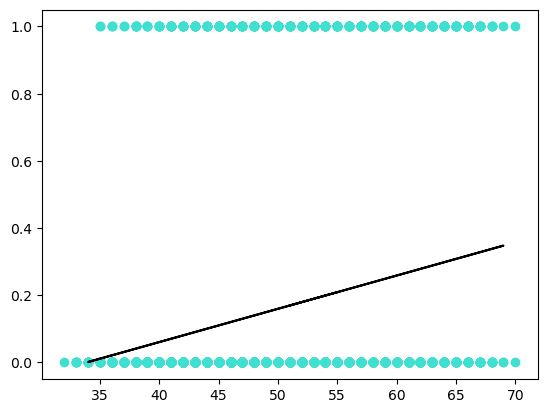

In [59]:
vars = ['age']
X = train_data.loc[:,vars]
y = train_data['TenYearCHD']
Xt = test_data.loc[:,vars]
yt = test_data['TenYearCHD']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

y_pred = regressor.predict(Xt)

print("Intercept: ", regressor.intercept_)
print("Coefficents: ", regressor.coef_)
print("Rsq: ",regressor.score(Xt, yt))

plt.scatter(X, y,color='turquoise')
plt.plot(Xt, y_pred,color='k')

plt.show()

Intercept:  -0.05763862859425001
Coefficents:  [0.00090398]
Rsq:  -0.006869271117833531


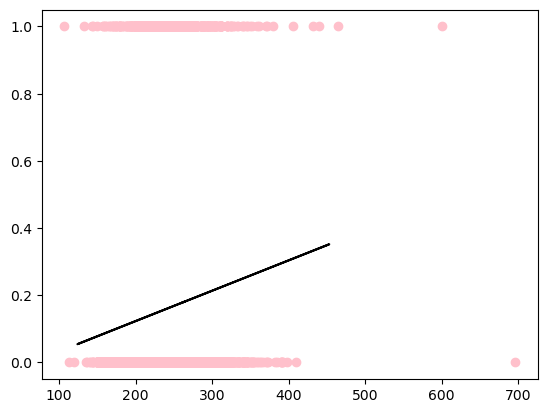

In [58]:
vars = ['totChol']
X = train_data.loc[:,vars]
y = train_data['TenYearCHD']
Xt = test_data.loc[:,vars]
yt = test_data['TenYearCHD']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

y_pred = regressor.predict(Xt)

print("Intercept: ", regressor.intercept_)
print("Coefficents: ", regressor.coef_)
print("Rsq: ",regressor.score(Xt, yt))

plt.scatter(X, y,color='pink')
plt.plot(Xt, y_pred,color='k')

plt.show()

Intercept:  -0.026245975419000395
Coefficents:  [0.00705108]
Rsq:  0.00846332887697776


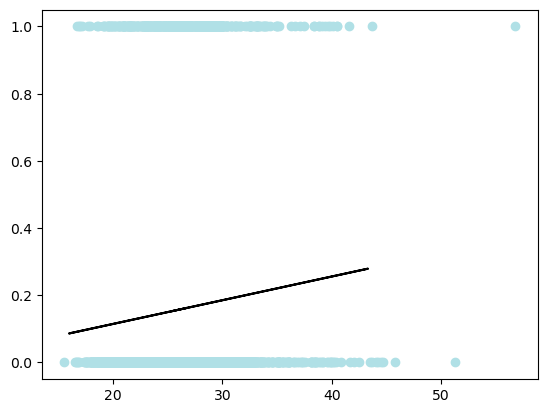

In [57]:
vars = ['BMI']
X = train_data.loc[:,vars]
y = train_data['TenYearCHD']
Xt = test_data.loc[:,vars]
yt = test_data['TenYearCHD']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

y_pred = regressor.predict(Xt)

print("Intercept: ", regressor.intercept_)
print("Coefficents: ", regressor.coef_)
print("Rsq: ",regressor.score(Xt, yt))

plt.scatter(X, y,color='powderblue')
plt.plot(Xt, y_pred,color='k')

plt.show()

Intercept:  0.1431425169727293
Coefficents:  [0.001492]
Rsq:  0.003830519177617786


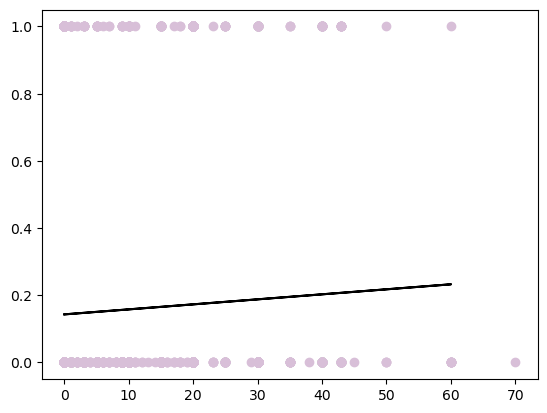

In [56]:
vars = ['cigsPerDay']
X = train_data.loc[:,vars]
y = train_data['TenYearCHD']
Xt = test_data.loc[:,vars]
yt = test_data['TenYearCHD']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

y_pred = regressor.predict(Xt)

print("Intercept: ", regressor.intercept_)
print("Coefficents: ", regressor.coef_)
print("Rsq: ",regressor.score(Xt, yt))

plt.scatter(X, y,color='thistle')
plt.plot(Xt, y_pred,color='k')

plt.show()

As seen above, with just one variable, it is clear that linear regression does not fit the data at all. In some cases, the Rsq value was less than zero, which means the model is worse than randomly guessing. Below, we'll try multilinear regression on the chosen variables from *Data Exploration* to see if better results can be attained.

In [185]:
vars1 = ['cigsPerDay']
vars2 = ['BMI']

In [55]:
vars = ['sex', 'age', 'prevalentHyp', 'totChol','sysBP']
X = train_data.loc[:,vars]
y = train_data['TenYearCHD']
Xt = test_data.loc[:,vars]
yt = test_data['TenYearCHD']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

y_pred = regressor.predict(Xt)

print("Intercept: ", regressor.intercept_)
print("Coefficents: ", regressor.coef_)
print("Rsq: ",regressor.score(Xt, yt))

# cannot be graphed because it is multivariable

Intercept:  -0.5937699254228808
Coefficents:  [0.08001016 0.00720154 0.02050159 0.00036622 0.00198178]
Rsq:  0.08662301905742475


In [54]:
X = train_data.drop(['TenYearCHD'], axis=1)
y = train_data['TenYearCHD']
Xt = test_data.drop(['TenYearCHD'], axis=1)
yt = test_data['TenYearCHD']

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

y_pred = regressor.predict(Xt)

print("Intercept: ", regressor.intercept_)
print("Coefficents: ", regressor.coef_)
print("Rsq: ",regressor.score(Xt, yt))

# cannot be graphed because it is multivariable

Intercept:  -0.5898869607999455
Coefficents:  [-7.25132014e-06  6.34928972e-02  7.00002681e-03 -2.34494626e-03
 -1.46219806e-02  2.74212480e-03  5.88738754e-02  1.99195822e-01
  2.35455876e-02  5.66045075e-02  3.42220185e-04  2.37287739e-03
 -1.70016314e-03  3.03844434e-04  4.52566819e-05  1.15241437e-03]
Rsq:  0.09683882160385826


Two MLRs were modeled above, one with specifically chosen variables and the other with every possible predictive variable. While significantly better than the single variable linear models, they still do not perform particularly well, with the best Rsq = 0.097. A close Rsq = 0.087 was achieved with just five variables, showing that they likely hold most of the predictive power and the 2nd MLR may be an overfit. As we initially predicted, a tree is likely to work better. Even though most of the predictive variables are numeric, `TenYearCHD` is strictly categorical, and its binary nature clearly does not work well for MLRs.

**Classification Tree Regression:**

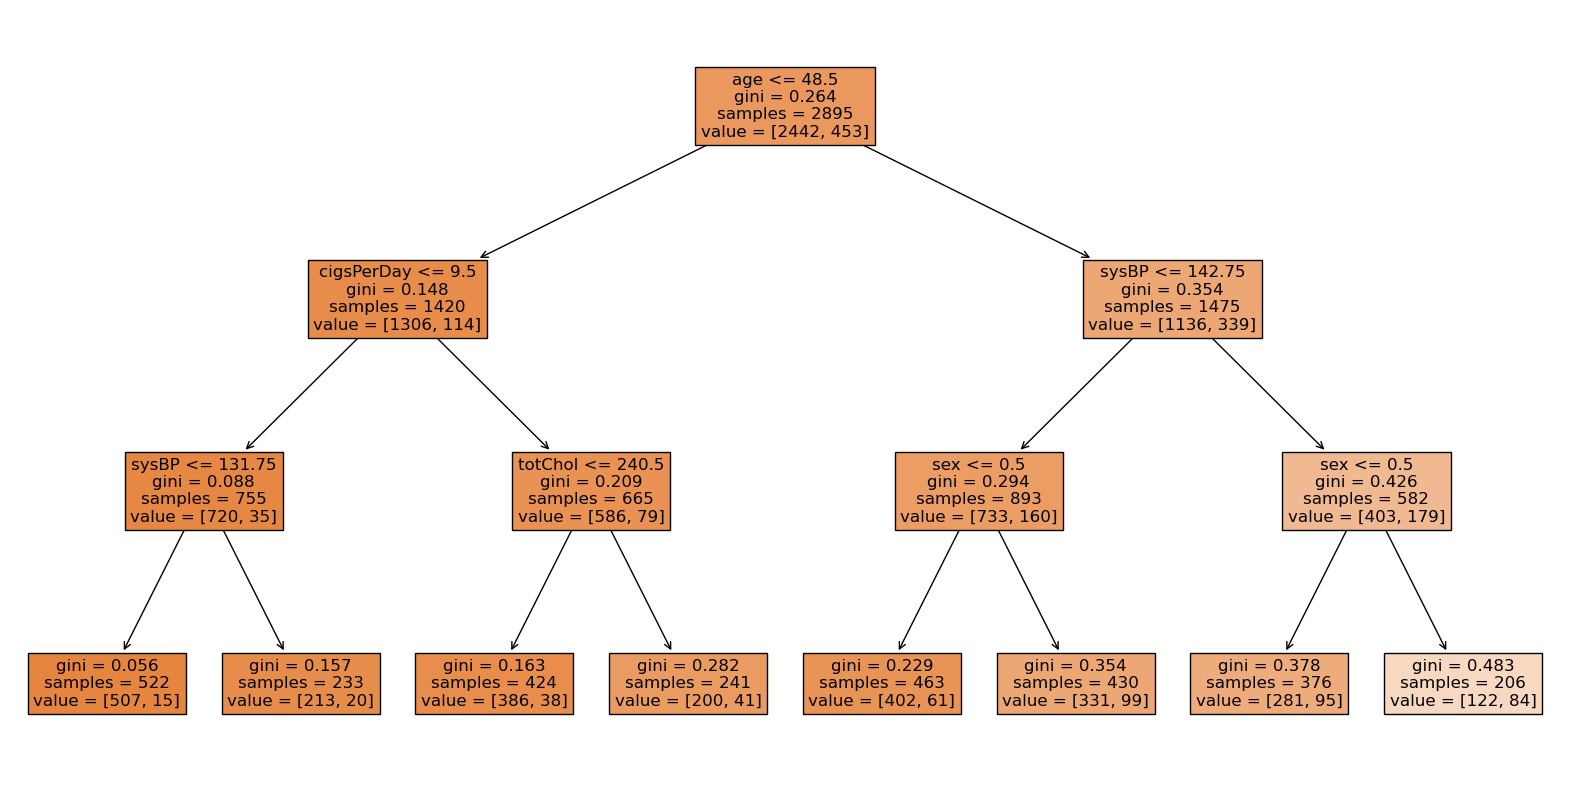

Tree rsq:  0.8526645768025078


In [30]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree plotter

# Process data:
y_train = train_data['TenYearCHD']
X_train = train_data.drop(['TenYearCHD'], axis=1)
var_list = list(X_train.columns)

# Fit decision tree:
cart = DecisionTreeClassifier(max_depth=3,min_samples_leaf=100) # Create a classifier object, limit depth to 3 to prevent overbranching
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(cart,filled=True, ax=ax, fontsize = 12,feature_names=var_list)
plt.show()

# Compute R-squared error:
X_test = test_data.drop(['TenYearCHD'], axis=1)
y_test = test_data['TenYearCHD']
y_hat = cart.predict(X_test)

print('Tree rsq: ', cart.score(X_test, y_test)) # R-squared

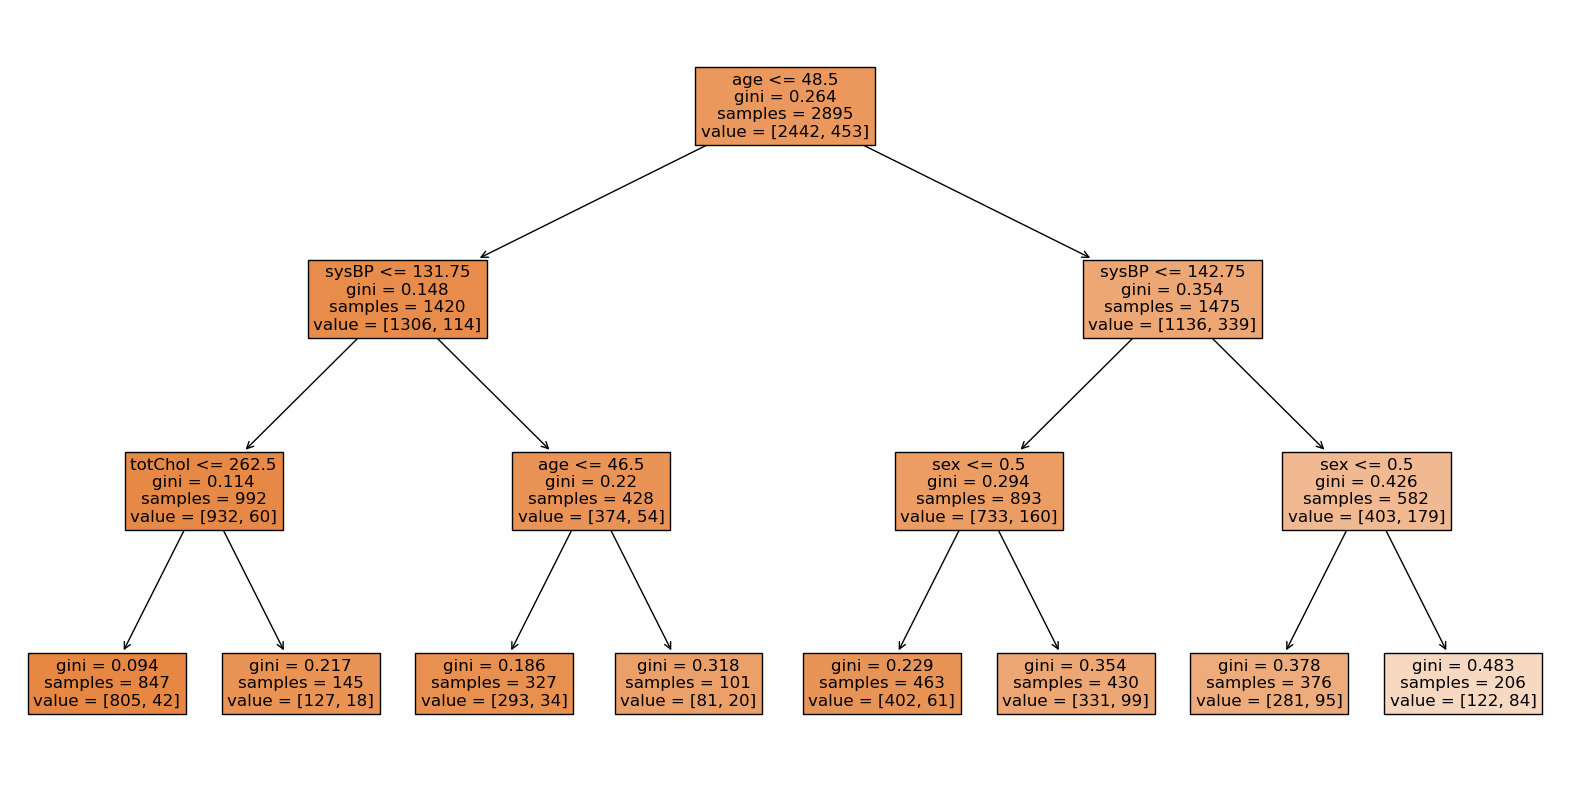

Tree rsq:  0.8526645768025078


In [65]:
# Process data:
vars = ['sex', 'age', 'prevalentHyp', 'totChol','sysBP']
y_train = train_data['TenYearCHD']
X_train = train_data.loc[:,vars]

# Fit decision tree:
cart = DecisionTreeClassifier(max_depth=3,min_samples_leaf=100) # Create a classifier object, limit depth to 3 to prevent overbranching
cart = cart.fit(X_train, y_train) # Fit the classifier


# Visualize results:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(cart,filled=True, ax=ax, fontsize = 12,feature_names=vars)
plt.show()

# Compute R-squared error:
X_test = test_data.loc[:,vars]
y_test = test_data['TenYearCHD']
y_hat = cart.predict(X_test)

print('Tree rsq: ', cart.score(X_test, y_test)) # R-squared

Between the two trees, the Rsq ended up being equal. However, the first tree used all available variables, whereas the second just used the previously selected five variables. Even though the tree nodes are slightly different, most of the predictive power is likely stored in these five variables. The full tree used `cigsPerDay`, so it could also have similar levels of predictive power in it.  

Furthermore, a lot of the predictive power of the tree seems to come from the first 1-2 nodes, as the R-squared value with `max_depth = 1` is already greater than 0.8. The best predictors of CHD seem to be age, smoking habits, hypertension, blood pressure, and cholesterol. This aligns well with what we would expect, as these attributes are physical characteristics of the cardiovascular system (except smoking, although it heavily affects it). The Classification Tree was built using the training data set with all the glucose `nans` removed and many of ther other `nans` imputed. The tree was then used on the testing set `test_data` which yielded an R-squared of 0.85. For a decision tree with no utilization of random forests, this can be considered a good result. The initial train-test split is why this is a good result — any change in that split will likely lead to different accuracy.

**Conclusion**

In summary, the results from our decision tree seem to have produced the most significant results (producing an rsq of 0.85). Looking at the gini index for each node, most of the values produced are low (indicating high purity). Specifically, some of our values are close to zero which would indicate that there is little to no mixing of classes. In the future, it may be helpful to compare the gini scores in each node across different models such as knn or kmc. Computing the RMSE would also be an important indicator for accessing the model's usefulness. Our linear models have some functionality; however, in reality they hold little predictive power and should not be used.
It is important to consider the background information for our predictive model. Although some variables seem to be better predictors of the development of CHD, further extensive evaluation may need to be performed. Further analysis should include random forests and KMC to better conclude what factors are the most correlated.